In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Definición de la función que modela el sloshing
def sloshing(tau, y, epsilon, lambda_, omega):
    u, v = y
    dv_dtau = -(1 + epsilon * lambda_ * omega**2 * np.cos(omega*tau)) * (u - (epsilon**2 * u**3)/6)
    return [v, dv_dtau]

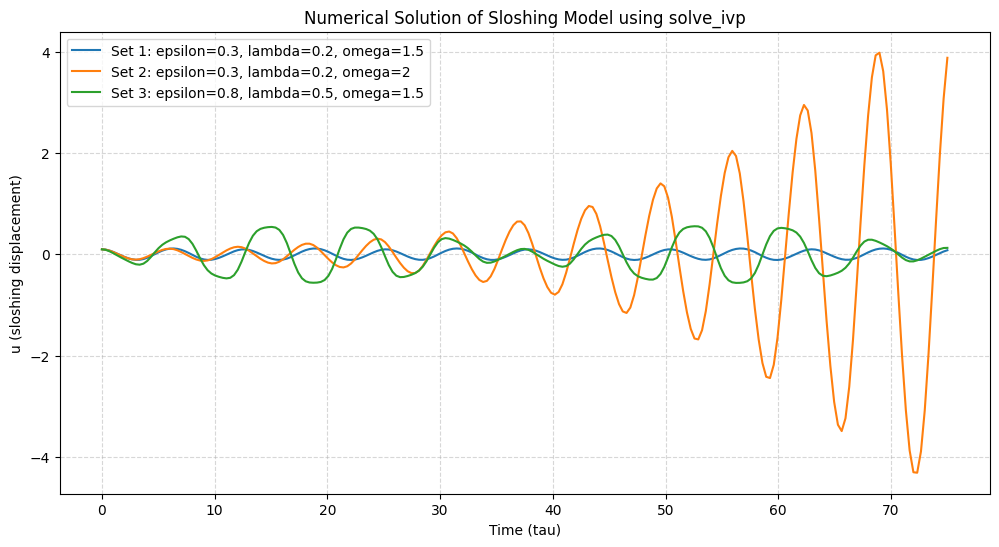

In [3]:
# Condiciones iniciales
u0 = [0.1, 0] # Desplazamiento inicial u(0) = 0.1, velocidad inicial du/dtau(0) = 0
time_span = (0, 75) # Intervalo de tiempo (tau)
time_eval = np.linspace(0, 75, 225) # Puntos donde se evaluará la solución

# Parámetros de simulación (epsilon, lambda, omega)
params1 = (0.3, 0.2, 1.5)
params2 = (0.3, 0.2, 2)
params3 = (0.8, 0.5, 1.5)

# Resolver el sistema de ecuaciones diferenciales para cada conjunto de parámetros
sol1 = solve_ivp(sloshing, time_span, u0, args=params1, t_eval=time_eval) 
sol2 = solve_ivp(sloshing, time_span, u0, args=params2, t_eval=time_eval) 
sol3 = solve_ivp(sloshing, time_span, u0, args=params3, t_eval=time_eval) 

# Graficar las soluciones
plt.figure(figsize=(12, 6))
plt.plot(sol1.t, sol1.y[0], label=f"Set 1: epsilon={params1[0]}, lambda={params1[1]}, omega={params1[2]}", linestyle='-', markersize=2)
plt.plot(sol2.t, sol2.y[0], label=f"Set 2: epsilon={params2[0]}, lambda={params2[1]}, omega={params2[2]}", linestyle='-', markersize=2)
plt.plot(sol3.t, sol3.y[0], label=f"Set 3: epsilon={params3[0]}, lambda={params3[1]}, omega={params3[2]}", linestyle='-', markersize=2)
plt.ylim()
plt.xlabel("Time (tau)")
plt.ylabel("u (sloshing displacement)")
plt.title("Numerical Solution of Sloshing Model using solve_ivp")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

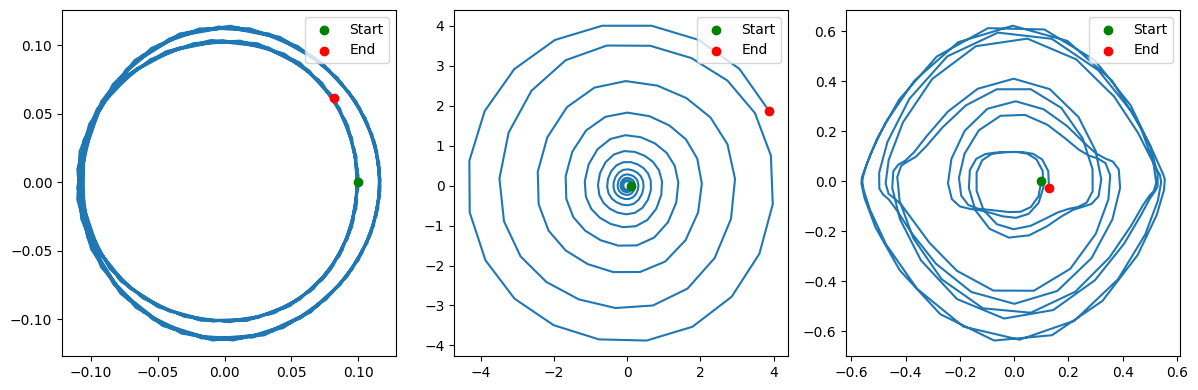

In [4]:
# Graficar desplazamiento vs velocidad
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(sol1.y[0], sol1.y[1])
plt.scatter(sol1.y[0, 0], sol1.y[1, 0], color='green', label='Start', zorder=3)
plt.scatter(sol1.y[0, -1], sol1.y[1, -1], color='red', label='End', zorder=3)
plt.legend(loc='upper right')

plt.subplot(1, 3, 2)
plt.plot(sol2.y[0], sol2.y[1])
plt.scatter(sol2.y[0, 0], sol2.y[1, 0], color='green', label='Start', zorder=3)
plt.scatter(sol2.y[0, -1], sol2.y[1, -1], color='red', label='End', zorder=3)
plt.legend(loc='upper right')

plt.subplot(1, 3, 3)
plt.plot(sol3.y[0], sol3.y[1])
plt.scatter(sol3.y[0, 0], sol3.y[1, 0], color='green', label='Start', zorder=3)
plt.scatter(sol3.y[0, -1], sol3.y[1, -1], color='red', label='End', zorder=3)
plt.legend(loc='upper right')

plt.tight_layout()

# Conclusiones sobre el impacto de los parámetros en el sloshing:  
Conjunto 1: epsilon = 0.3, lambda = 0.2, omega = 1.5  
Conjunto 2: epsilon = 0.3, lambda = 0.2, omega = 2  
Conjunto 3: epsilon = 0.8, lambda = 0.5, omega = 1.5  

## Epsilon y Lambda 
A medida que estos parámetros aumentan, el sistema se vuelve más inestable y las oscilaciones son más pronunciadas. Esto se observa al comparar los resultados obtenidos entre el conjunto 1 y 3 de parámetros, donde los desplazamientos son mayores cuando se aumentan los valores de epsilon, lambda y se deja igual el valor de omega. Valores pequeños de epsilon y lambda tienden a producir oscilaciones más controladas. 

## Omega
Un aumento en el valor de omega cambia la dinámica del sistema, generando mayores oscilaciones. Esto se observa al comparar los resultados obtenidos entre el conjunto 1 y 2 de parámetros, donde los desplazamientos son mayores cuando epsilon y lambda permanecen constantes y se incrementa omega. Este cambio provoca desplazamientos con tendencia a seguir creciendo, incluso para valores relativamente pequeños de epsilon y lambda.

In [5]:
#Definición de funciones para realizar el método de Heun.
def f0(tau, u, v, epsilon, lambda_, omega):
  return v

def f1(tau, u, v, epsilon, lambda_, omega):
  return -(1 + float(epsilon) * float(lambda_) * (float(omega) ** 2) * np.cos(float(omega) * tau)) * (u - ((float(epsilon) ** 2) * (u ** 3))/6)

#Listas
fun = [f0, f1] #Lista de funciones.
aprox = [] #Lista de listas de aproximaciones de la función.

#Parámetros del método
N = 225 #Número de puntos a aproximar
h = time_span[1] / N #Tamaño del paso.

In [6]:
#Definimos el método de Heun como función
def Heun(epsilon, lambda_, omega):
    tau = time_span[0] #Se define el tiempo inicial
    aprox_temp = [[0.1], [0]] #Lista de aproximaciones
    u = [0.1, 0] #Valores iniciales
    for i in range(N - 1):
        k1 = []  # Lista para almacenar k1 (pendientes en el punto inicial)
        k2 = []  # Lista para almacenar k1 (pendientes en el primer punto intermedio)
        k3 = []   # Lista para almacenar k1 (pendientes en el segundo punto intermedio)
        for j in range(len(fun)):
            k1.append(fun[j](tau, u[0], u[1], epsilon, lambda_, omega))
        for j in range(len(fun)):
            k2.append(fun[j](tau + h / 3, u[0] + (h * k1[0]) / 3, u[1] + (h * k1[1]) / 3, epsilon, lambda_, omega))
        for j in range(len(fun)):
            k3.append(fun[j](tau + (2 * h) / 3, u[0] + (2 * h * k2[0]) / 3, u[1] + (2 * h * k2[1]) / 3, epsilon, lambda_, omega))
        # Actualización de la solución usando una combinación ponderada de k1 y k3
        for j in range(len(fun)):
            u[j] = u[j] + ((k1[j] + 3 * k3[j]) * h) / 4
            aprox_temp[j].append(u[j])
        tau += h #Actualización del tiempo para la siguiente iteración
    return aprox_temp


In [7]:
#Utilizamos el método de Heun en tres diferentes conjuntos de parámetros.
aprox1 = Heun(0.3, 0.2, 1.5)
aprox2 = Heun(0.3, 0.2, 2)
aprox3 = Heun(0.8, 0.5, 1.5)

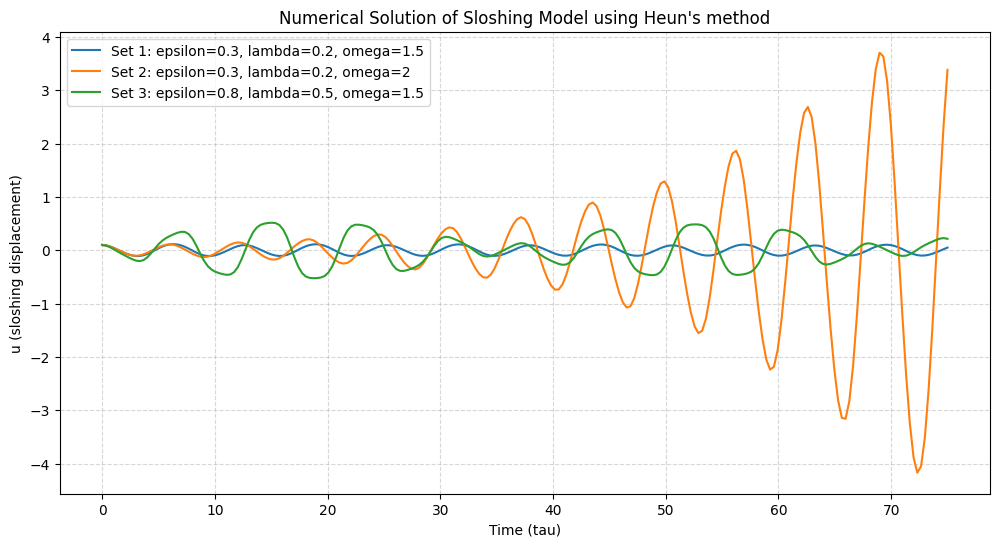

In [8]:
#Graficar las aproximaciones obtenidas del método de Heun.
plt.figure(figsize=(12, 6))
plt.plot(time_eval, aprox1[0], label=f"Set 1: epsilon={params1[0]}, lambda={params1[1]}, omega={params1[2]}", markersize = 2)
plt.plot(time_eval, aprox2[0], label=f"Set 2: epsilon={params2[0]}, lambda={params2[1]}, omega={params2[2]}", markersize = 2)
plt.plot(time_eval, aprox3[0], label=f"Set 3: epsilon={params3[0]}, lambda={params3[1]}, omega={params3[2]}", markersize = 2)
plt.ylim()
plt.xlabel("Time (tau)")
plt.ylabel("u (sloshing displacement)")
plt.title("Numerical Solution of Sloshing Model using Heun's method")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Comparación de resultados

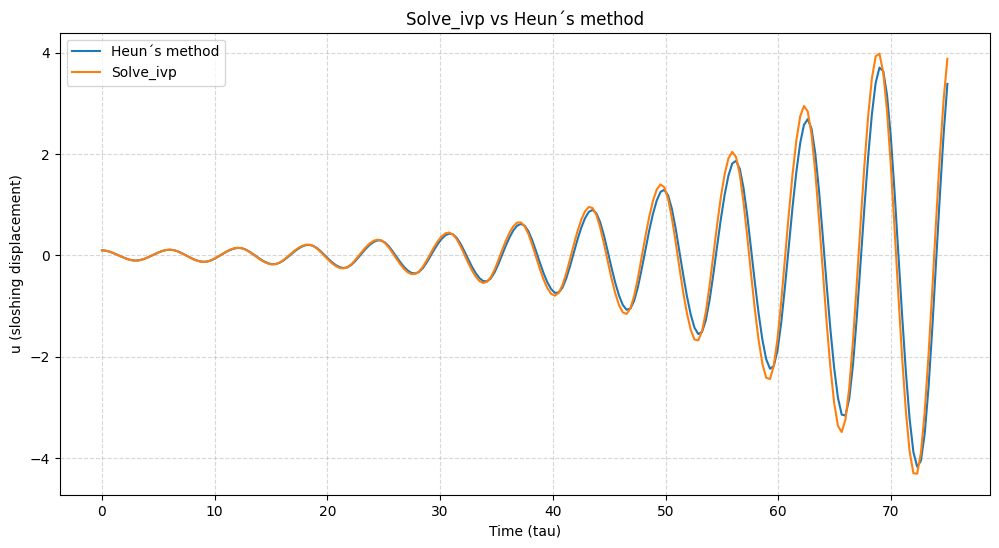

In [9]:
#Comparación de resultados evaluados en epsilon = 0.3, lambda = 0.2, omega = 2
plt.figure(figsize=(12, 6))
plt.plot(time_eval, aprox2[0], label=f"Heun´s method", markersize = 2)
plt.plot(sol2.t, sol2.y[0], label=f"Solve_ivp", linestyle='-', markersize=2)
plt.ylim()
plt.xlabel("Time (tau)")
plt.ylabel("u (sloshing displacement)")
plt.title("Solve_ivp vs Heun´s method")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

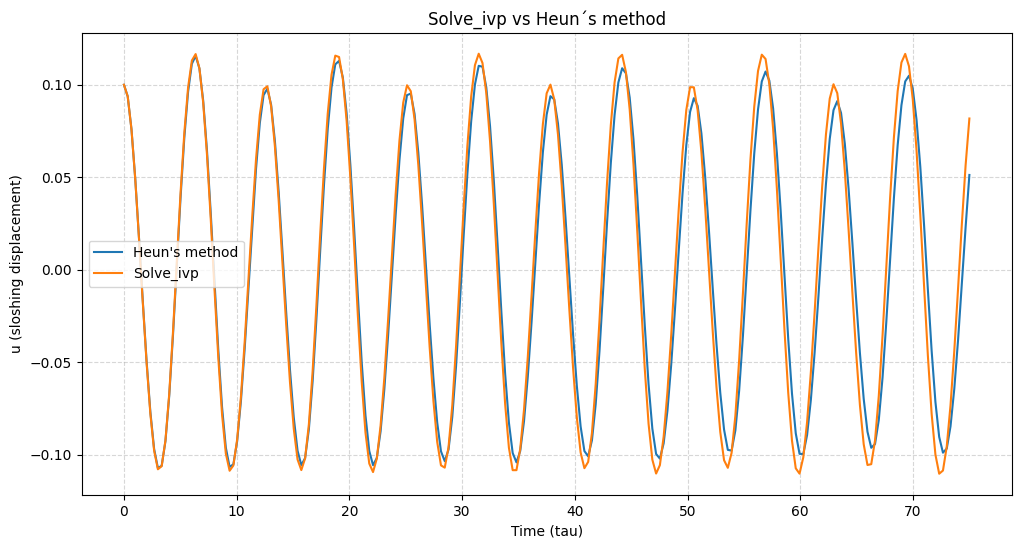

In [10]:
#Comparación de resultados evaluados en epsilon = 0.3, lambda = 0.2, omega = 1.5
plt.figure(figsize=(12, 6))
plt.plot(time_eval, aprox1[0], label=f"Heun's method", markersize = 2)
plt.plot(sol1.t, sol1.y[0], label=f"Solve_ivp", linestyle='-', markersize=2)
plt.ylim()
plt.xlabel("Time (tau)")
plt.ylabel("u (sloshing displacement)")
plt.title("Solve_ivp vs Heun´s method")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

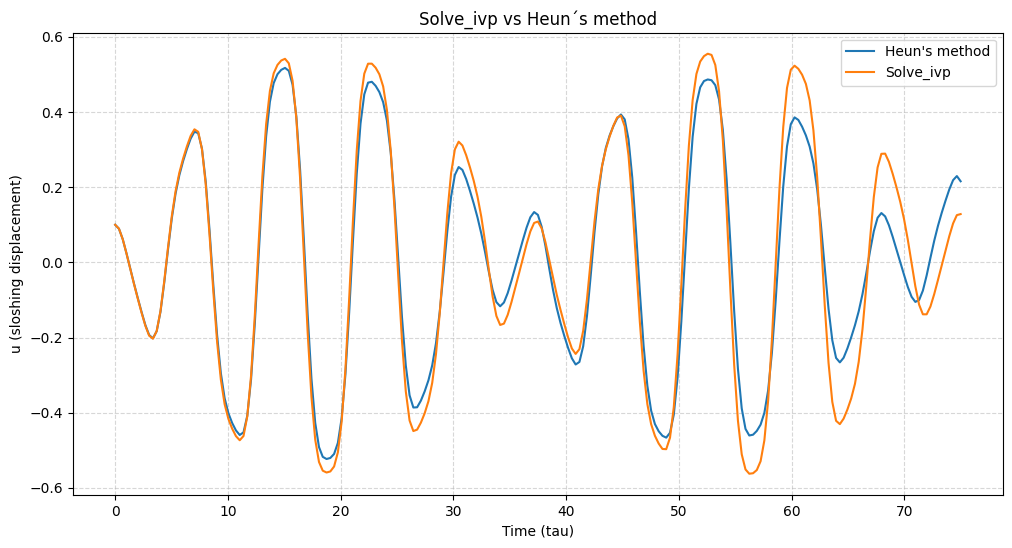

In [11]:
#Comparación de resultados evaluados en epsilon = 0.8, lambda = 0.5, omega = 1.5
plt.figure(figsize=(12, 6))
plt.plot(time_eval, aprox3[0], label=f"Heun's method", markersize = 2)
plt.plot(sol3.t, sol3.y[0], label=f"Solve_ivp", linestyle='-', markersize=2)
plt.ylim()
plt.xlabel("Time (tau)")
plt.ylabel("u (sloshing displacement)")
plt.title("Solve_ivp vs Heun´s method")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Observaciones

Podemos evidenciar que la aproximación que tiene el método de Heun a comparación de la de Solve_ivp es bastante cercana tiendo en cuenta que el tamaño del paso es de aproximadamente 0.33. Sin embargo se puede notar una discrepancia a medida que el tiempo $(Tau)$ aumenta dado al error de truncamiento acumulado que ocasiona la computadora y porque el método tiene un error local de orden $O(h^3)$

Aun así, si aumentamos el número de puntos sobre los que aproximamos la función se tendrá que las dos gráficas se asemejarán a medida que disminuye el tamaño del paso, es decir, el espacio entre dos aproximaciones contiguas. Ocasionando que los resultados obtenidos ean relativamente igual de cercanos a la solución real sin significar un costo computacional relevante.